In [1]:
# IMPORT LIBRARIES NEEDED
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

LOAD DATA

In [4]:
df = pd.read_csv('laptop_price.csv')
df.head()

,Unnamed: 0,Name,Processor,RAM,Operating System,Storage,Display,Warranty,Price,rating
0,0,Lenovo Ideapad S145 Core i5 10th Gen - (8 GB/1...,Intel Core i5 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,1 TB HDD,39.62 cm (15.6 inch) Display,1 Year Onsite Warranty,"₹43,990",3.9
1,1,Lenovo IdeaPad Core i3 11th Gen - (8 GB/256 GB...,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,256 GB SSD,35.56 cm (14 Inch) Display,1 Year Onsite Warranty,"₹43,990",4.2
2,2,HP Pentium Quad Core - (8 GB/256 GB SSD/Window...,Intel Pentium Quad Core Processor,8 GB DDR4 RAM,64 bit Windows 10 Operating System,256 GB SSD,35.56 cm (14 inch) Display,1 Year Onsite Warranty,"₹31,490",4.6
3,3,HP 14s Core i3 11th Gen - (8 GB/256 GB SSD/Win...,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,256 GB SSD,35.56 cm (14 inch) Display,1 Year Onsite Warranty,"₹40,990",4.1
4,4,HP 15s Athlon Dual Core - (4 GB/1 TB HDD/Windo...,AMD Athlon Dual Core Processor,4 GB DDR4 RAM,64 bit Windows 10 Operating System,1 TB HDD,39.62 cm (15.6 inch) Display,1 Year Onsite Warranty,"₹27,490",4.1


DATA CLEANING

In [5]:
# removing the unnamed colum
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
df.head()

,Name,Processor,RAM,Operating System,Storage,Display,Warranty,Price,rating
0,Lenovo Ideapad S145 Core i5 10th Gen - (8 GB/1...,Intel Core i5 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,1 TB HDD,39.62 cm (15.6 inch) Display,1 Year Onsite Warranty,"₹43,990",3.9
1,Lenovo IdeaPad Core i3 11th Gen - (8 GB/256 GB...,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,256 GB SSD,35.56 cm (14 Inch) Display,1 Year Onsite Warranty,"₹43,990",4.2
2,HP Pentium Quad Core - (8 GB/256 GB SSD/Window...,Intel Pentium Quad Core Processor,8 GB DDR4 RAM,64 bit Windows 10 Operating System,256 GB SSD,35.56 cm (14 inch) Display,1 Year Onsite Warranty,"₹31,490",4.6
3,HP 14s Core i3 11th Gen - (8 GB/256 GB SSD/Win...,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,256 GB SSD,35.56 cm (14 inch) Display,1 Year Onsite Warranty,"₹40,990",4.1
4,HP 15s Athlon Dual Core - (4 GB/1 TB HDD/Windo...,AMD Athlon Dual Core Processor,4 GB DDR4 RAM,64 bit Windows 10 Operating System,1 TB HDD,39.62 cm (15.6 inch) Display,1 Year Onsite Warranty,"₹27,490",4.1


In [6]:
# removing the rupee symbol(India currency) on price column
df['Price'] = df['Price'].str.replace(',', '')
df['Price'] = df['Price'].str.replace('₹', '')
df.head()

,Name,Processor,RAM,Operating System,Storage,Display,Warranty,Price,rating
0,Lenovo Ideapad S145 Core i5 10th Gen - (8 GB/1...,Intel Core i5 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,1 TB HDD,39.62 cm (15.6 inch) Display,1 Year Onsite Warranty,43990,3.9
1,Lenovo IdeaPad Core i3 11th Gen - (8 GB/256 GB...,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,256 GB SSD,35.56 cm (14 Inch) Display,1 Year Onsite Warranty,43990,4.2
2,HP Pentium Quad Core - (8 GB/256 GB SSD/Window...,Intel Pentium Quad Core Processor,8 GB DDR4 RAM,64 bit Windows 10 Operating System,256 GB SSD,35.56 cm (14 inch) Display,1 Year Onsite Warranty,31490,4.6
3,HP 14s Core i3 11th Gen - (8 GB/256 GB SSD/Win...,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,256 GB SSD,35.56 cm (14 inch) Display,1 Year Onsite Warranty,40990,4.1
4,HP 15s Athlon Dual Core - (4 GB/1 TB HDD/Windo...,AMD Athlon Dual Core Processor,4 GB DDR4 RAM,64 bit Windows 10 Operating System,1 TB HDD,39.62 cm (15.6 inch) Display,1 Year Onsite Warranty,27490,4.1


In [7]:
# removing the text all rows of the RAM column.
# so that we can treat it as number data.
df["RAM"] = df.RAM.str.replace('\s.*','')

df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


,Name,Processor,RAM,Operating System,Storage,Display,Warranty,Price,rating
0,Lenovo Ideapad S145 Core i5 10th Gen - (8 GB/1...,Intel Core i5 Processor (10th Gen),8,64 bit Windows 10 Operating System,1 TB HDD,39.62 cm (15.6 inch) Display,1 Year Onsite Warranty,43990,3.9
1,Lenovo IdeaPad Core i3 11th Gen - (8 GB/256 GB...,Intel Core i3 Processor (11th Gen),8,64 bit Windows 10 Operating System,256 GB SSD,35.56 cm (14 Inch) Display,1 Year Onsite Warranty,43990,4.2
2,HP Pentium Quad Core - (8 GB/256 GB SSD/Window...,Intel Pentium Quad Core Processor,8,64 bit Windows 10 Operating System,256 GB SSD,35.56 cm (14 inch) Display,1 Year Onsite Warranty,31490,4.6
3,HP 14s Core i3 11th Gen - (8 GB/256 GB SSD/Win...,Intel Core i3 Processor (11th Gen),8,64 bit Windows 10 Operating System,256 GB SSD,35.56 cm (14 inch) Display,1 Year Onsite Warranty,40990,4.1
4,HP 15s Athlon Dual Core - (4 GB/1 TB HDD/Windo...,AMD Athlon Dual Core Processor,4,64 bit Windows 10 Operating System,1 TB HDD,39.62 cm (15.6 inch) Display,1 Year Onsite Warranty,27490,4.1


In [8]:
# removing the text all rows of the Warranty column.
# so that we can treat it as number data.
df["Warranty"] = df.Warranty.str.replace('\s.*','')
df.tail()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


,Name,Processor,RAM,Operating System,Storage,Display,Warranty,Price,rating
545,ASUS ASUS TUF Dash Series Core i7 11th Gen - (...,AMD Ryzen 7 Octa Core Processor,8,64 bit Windows 10 Operating System,256 GB SSD,"Matrix Display, Dragon Center, Cooler Boost 5,...",1,136990,4.9
546,ASUS Ryzen 3 Dual Core 3250U - (4 GB/256 GB SS...,Intel Core i7 Processor (10th Gen),16,64 bit Windows 10 Operating System,1 TB HDD|256 GB SSD,35.56 cm (14 inch) Touchscreen Display,1,37900,3.9
547,MSI GL65 Leopard Core i7 10th Gen - (16 GB/1 T...,AMD Ryzen 7 Quad Core Processor,4,64 bit Windows 10 Operating System,1 TB HDD|512 GB SSD,33.78 cm (13.3 inch) Display,1,109990,3.5
548,HP Pavilion Core i7 9th Gen - (12 GB/1 TB HDD/...,AMD Ryzen 7 Octa Core Processor,16,Windows 10 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display,1,122000,4.5
549,DELL GAMING G5 SERIES Core i5 10th Gen - (8 GB...,Intel Core i5 Processor (10th Gen),12,64 bit Windows 10 Operating System,1 TB HDD|256 GB SSD,35.56 cm (14 inch) Display,1,79990,4.1


In [9]:
print(df['Operating System'].value_counts())
print('----------------------')
print(df['Operating System'].value_counts().count())
print('----------------------')
print(df['Operating System'].value_counts().value_counts())

64 bit Windows 10 Operating System                                                                                         492
Windows 10 Operating System                                                                                                 22
Mac OS Operating System                                                                                                     20
Pre-installed Genuine Windows 10 Operating System (Includes Built-in Security, Free Automated Updates, Latest Features)     11
64 bit Chrome Operating System                                                                                               3
DOS Operating System                                                                                                         2
Name: Operating System, dtype: int64
----------------------
6
----------------------
492    1
22     1
20     1
11     1
3      1
2      1
Name: Operating System, dtype: int64


In [10]:
#droping irrelevant column such as operating system. Becuase it is same for every laptop.
# droping rating becuase it is no where correlated with price.

df.drop(['rating', 'Operating System'], axis = 1, inplace = True)
df.head()

,Name,Processor,RAM,Storage,Display,Warranty,Price
0,Lenovo Ideapad S145 Core i5 10th Gen - (8 GB/1...,Intel Core i5 Processor (10th Gen),8,1 TB HDD,39.62 cm (15.6 inch) Display,1,43990
1,Lenovo IdeaPad Core i3 11th Gen - (8 GB/256 GB...,Intel Core i3 Processor (11th Gen),8,256 GB SSD,35.56 cm (14 Inch) Display,1,43990
2,HP Pentium Quad Core - (8 GB/256 GB SSD/Window...,Intel Pentium Quad Core Processor,8,256 GB SSD,35.56 cm (14 inch) Display,1,31490
3,HP 14s Core i3 11th Gen - (8 GB/256 GB SSD/Win...,Intel Core i3 Processor (11th Gen),8,256 GB SSD,35.56 cm (14 inch) Display,1,40990
4,HP 15s Athlon Dual Core - (4 GB/1 TB HDD/Windo...,AMD Athlon Dual Core Processor,4,1 TB HDD,39.62 cm (15.6 inch) Display,1,27490


In [11]:
# converting price datatype from 'object' to 'integer'
df["Price"] = df["Price"].astype(str).astype(int)
print(df.dtypes)

Name         object
Processor    object
RAM          object
Storage      object
Display      object
Warranty     object
Price         int64
dtype: object


In [12]:
df['Storage'] = df['Storage'].replace('1 TB', '1024 GB', regex=True)
df.head()

,Name,Processor,RAM,Storage,Display,Warranty,Price
0,Lenovo Ideapad S145 Core i5 10th Gen - (8 GB/1...,Intel Core i5 Processor (10th Gen),8,1024 GB HDD,39.62 cm (15.6 inch) Display,1,43990
1,Lenovo IdeaPad Core i3 11th Gen - (8 GB/256 GB...,Intel Core i3 Processor (11th Gen),8,256 GB SSD,35.56 cm (14 Inch) Display,1,43990
2,HP Pentium Quad Core - (8 GB/256 GB SSD/Window...,Intel Pentium Quad Core Processor,8,256 GB SSD,35.56 cm (14 inch) Display,1,31490
3,HP 14s Core i3 11th Gen - (8 GB/256 GB SSD/Win...,Intel Core i3 Processor (11th Gen),8,256 GB SSD,35.56 cm (14 inch) Display,1,40990
4,HP 15s Athlon Dual Core - (4 GB/1 TB HDD/Windo...,AMD Athlon Dual Core Processor,4,1024 GB HDD,39.62 cm (15.6 inch) Display,1,27490


Encoding

In [13]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

In [14]:
df.head()

,Name,Processor,RAM,Storage,Display,Warranty,Price
0,Lenovo Ideapad S145 Core i5 10th Gen - (8 GB/1...,Intel Core i5 Processor (10th Gen),8,1024 GB HDD,39.62 cm (15.6 inch) Display,1,43990
1,Lenovo IdeaPad Core i3 11th Gen - (8 GB/256 GB...,Intel Core i3 Processor (11th Gen),8,256 GB SSD,35.56 cm (14 Inch) Display,1,43990
2,HP Pentium Quad Core - (8 GB/256 GB SSD/Window...,Intel Pentium Quad Core Processor,8,256 GB SSD,35.56 cm (14 inch) Display,1,31490
3,HP 14s Core i3 11th Gen - (8 GB/256 GB SSD/Win...,Intel Core i3 Processor (11th Gen),8,256 GB SSD,35.56 cm (14 inch) Display,1,40990
4,HP 15s Athlon Dual Core - (4 GB/1 TB HDD/Windo...,AMD Athlon Dual Core Processor,4,1024 GB HDD,39.62 cm (15.6 inch) Display,1,27490


In [15]:
column = [Predictor for Predictor in df.columns if df[Predictor].dtype == 'O']
for Predictor in column:
    labels_ordered= df.groupby([Predictor])['Price'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    df[Predictor]=df[Predictor].map(labels_ordered)

df.head()

,Name,Processor,RAM,Storage,Display,Warranty,Price
0,67,24,1,4,13,3,43990
1,68,14,1,8,20,3,43990
2,17,0,1,8,16,3,31490
3,48,14,1,8,16,3,40990
4,7,30,0,4,13,3,27490


In [16]:
#seprating target vraible from features
Target = df['Price']
features = df.drop(columns='Price')

In [17]:
Target

0       43990
1       43990
2       31490
3       40990
4       27490
        ...  
545    136990
546     37900
547    109990
548    122000
549     79990
Name: Price, Length: 550, dtype: int64

In [18]:
features

,Name,Processor,RAM,Storage,Display,Warranty
0,67,24,1,4,13,3
1,68,14,1,8,20,3
2,17,0,1,8,16,3
3,48,14,1,8,16,3
4,7,30,0,4,13,3
...,...,...,...,...,...,...
545,330,35,1,8,15,3
546,30,20,3,6,22,3
547,298,17,0,3,14,3
548,316,35,3,5,13,3


Standardizing

In [19]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler() 

#features = scaler.fit_transform(features)
#features = pd.DataFrame(features)

In [20]:
features

,Name,Processor,RAM,Storage,Display,Warranty
0,67,24,1,4,13,3
1,68,14,1,8,20,3
2,17,0,1,8,16,3
3,48,14,1,8,16,3
4,7,30,0,4,13,3
...,...,...,...,...,...,...
545,330,35,1,8,15,3
546,30,20,3,6,22,3
547,298,17,0,3,14,3
548,316,35,3,5,13,3


Splitting the data into training and test set

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, Target, test_size = 0.2, random_state=42, shuffle= True)


Training the model on random forest regressor

In [22]:
from sklearn.ensemble import RandomForestRegressor
model1 = RandomForestRegressor(random_state=10)
model1.fit(X_train,y_train)

RandomForestRegressor(random_state=10)

In [23]:
y_test.shape

(110,)

In [24]:
print("Training score")
print(model1.score(X_train,y_train))
print('\r')
print("Testing score")
print(model1.score(X_test,y_test))

Training score
0.9984606744500282

Testing score
0.9862321308434462


In [25]:
# predictions using our test data
y_pred = model1.predict(X_test)
y_pred

array([ 43995.  ,  43990.  , 128546.25,  62997.  ,  65671.31,  86477.7 ,
        69846.98,  67990.39,  59986.  ,  50756.9 ,  64966.13,  58983.88,
        93559.41,  46190.09, 113667.  ,  43798.04,  34245.04,  50597.8 ,
        98492.97,  29776.25, 109994.05,  62686.  ,  59983.53,  85126.51,
       118120.7 , 135946.18,  50197.1 ,  87899.43, 114771.19,  44015.  ,
       292480.63,  43698.98,  78795.8 ,  67958.51,  61343.14,  39141.38,
        31196.17,  59980.62,  65105.11,  82423.69, 109990.  ,  69928.48,
        58208.95,  99994.89,  39410.64,  38752.24,  41512.7 ,  72754.98,
        46140.09,  64106.06, 130491.62,  56425.97, 160830.  ,  94974.03,
       116990.  ,  43990.  ,  76668.  ,  43990.  , 147399.23,  28372.36,
        68561.42,  88287.7 ,  92817.18, 111276.49, 125060.79,  37236.9 ,
       140388.  , 150901.75,  43990.  ,  63905.62,  98601.92,  84011.26,
        60989.  , 115174.82, 117000.  ,  58024.95,  43990.  ,  27587.27,
       116990.  , 109990.  ,  40900.  ,  89333.02, 

Text(0, 0.5, 'y_pred')

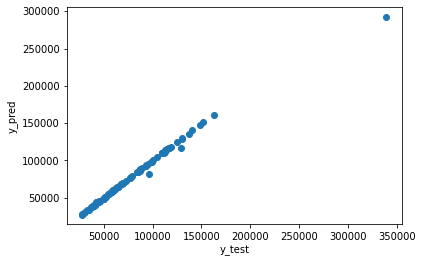

In [26]:
plt.scatter(y_test,y_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred')

In [27]:
X_train

,Name,Processor,RAM,Storage,Display,Warranty
482,300,20,0,5,16,4
158,282,25,1,6,13,5
15,158,23,1,5,13,3
334,191,21,1,6,13,2
39,298,22,3,5,13,3
...,...,...,...,...,...,...
71,72,25,1,5,13,3
106,49,23,1,8,13,3
270,372,20,5,4,24,4
435,67,20,1,1,21,3


In [28]:
y_train

482    109999
158     99990
15      62690
334     68968
39     109990
        ...  
71      44990
106     40990
270    264990
435     43990
102    154990
Name: Price, Length: 440, dtype: int64

In [29]:
# Making a predictive system
input_data = (300, 20, 0, 5, 16, 4)

#changing the input _data to numpy_array
input_data_numpy_array = np.asarray(input_data)

#reshape the array as we are predicting for one instance 
input_data_reshaped = input_data_numpy_array.reshape(1,-1)

prediction = model1.predict(input_data_reshaped)
print(f'the price of the laptop you want is :' , prediction)

the price of the laptop you want is : [109995.4]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


LinearRegression Model

In [30]:
#from sklearn.linear_model import LinearRegression

In [31]:
#model2=LinearRegression()

In [32]:
#model2.fit(X_train,y_train)

In [33]:
#model2.score(X_test,y_test)

In [34]:
#predictions=model2.predict(X_test)


In [35]:
#plt.scatter(y_test,predictions)
#plt.xlabel('y_test')
#plt.ylabel('predictions')

Decison Tree regressor model

In [36]:
#from sklearn.tree import DecisionTreeRegressor

In [37]:
#model3=DecisionTreeRegressor()

In [38]:
#model3.fit(X_train,y_train)

In [39]:
#model3.score(X_test,y_test)

In [40]:
#prediction=model3.predict(X_test)

In [41]:
#plt.scatter(y_test,prediction)
#plt.xlabel('y_test')
#plt.ylabel('prediction')

In [42]:
# Random Forest Regressor better than all the other models

In [46]:
# saving model
import pickle

In [47]:
filename = 'trained_model.sav'
pickle.dump(model1, open(filename, 'wb'))

In [49]:
# load saved model
loaded_model = pickle.load(open('trained_model.sav', 'rb'))

In [50]:
# Making a predictive system
input_data = (300, 20, 0, 5, 16, 4)

#changing the input _data to numpy_array
input_data_numpy_array = np.asarray(input_data)

#reshape the array as we are predicting for one instance 
input_data_reshaped = input_data_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)
print(f'the price of the laptop you want is :' , prediction)

the price of the laptop you want is : [109995.4]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"
